"""
Here I want you to write a code that will solve the secretary problem.

In this discussion, n = number of applicants and r = information gathering
cutoff. That is, you will sample the first r-1. Of those, you will find the 
best candidate and record their score (qr). You will then continue to sample the
remainder of the candidates until you find one that is better than qr. 
This is the one you will choose. The question then becomes, did you find the best
candidate?

Below I provide some initial code to take a value or (n) and produce a random 
sequence of candidate scores (no two are the same).

I want you to write a function loop_strategy_r(n) that does the following.
1) Takes in (n) and produces the number of candidates.
2) Loops over (r) and for each (r), implements selection strategy with cutoff r-1.
3) Records whether you chose the best candidate for that r and that simulation.
4) Runs that simulation, for each r, 10_000 times.
5) For each r, returns P(r), the probability that r-value will lead to you hiring the best candidate.

So you will run ~10_000*99 simulations (99 r vals and 10_000).

This function loop_strategy_r(n), for n=99 will should return a vector of 100 probabilities.
P(r) for each r=2:100 that is. Since you reject the first r-1 candidates, r=1 doesn't make sense.

"""

In [1]:
using Pkg
Pkg.instantiate()
Pkg.status()

Status `~/.julia/environments/v1.10/Project.toml`
  [31c24e10] Distributions v0.25.107
  [033835bb] JLD2 v0.4.45
  [f0f68f2c] PlotlyJS v0.18.12
  [91a5bcdd] Plots v1.40.0
  [f3b207a7] StatsPlots v0.15.6


In [2]:
using Random
using Plots

Random.seed!(45461); # Good practice

In [3]:
n=100; # Number of total applicants

In [4]:
# This function takes applicant number (n) and produces a
# randomized set of scores where no two are equal
function Gen_Applicant_Score_Vec(n)
    score_vec = Vector(1:n); # This is ordered. Need to random permute it
    score_shuffled = shuffle(score_vec)
    return score_shuffled
end

Gen_Applicant_Score_Vec (generic function with 1 method)

In [7]:

# Simulate the selection strategy for a given n till r, gives as the best candidat
function simulate_selection(n, r)
    scores =Gen_Applicant_Score_Vec(n)  # Generate a random sequence of candidate scores
    best_so_far = maximum(scores[1:r-1])  # Find the best one in the first r-1 candidates
    for i in r:n
        if scores[i] > best_so_far  # If find a better candidate after r-1
            return scores[i] == n  # Check if this candidate is the best overall
        end
    end
    return false  # If didn't find a better candidate after r-1
end

# Loop over r and run the selection strategy simulation 10,000 times
function loop_strategy_r(n)
    probabilities = Float64[]  # Store the probability of selecting the best candidate for each r
    
    for r in 2:n  # Starting from 2 because r=1 doesn't make sense
        success_count = 0
        for _ in 1:10_000
            if simulate_selection(n, r)
                success_count += 1
            end
        end
        push!(probabilities, success_count / 10_000)  # Calculate P(r)
    end
    
    return probabilities
end

# Example usage for n=99
n = 100
probabilities = loop_strategy_r(n)
probabilities  

99-element Vector{Float64}:
 0.0531
 0.0852
 0.1023
 0.1298
 0.1475
 0.1706
 0.1957
 0.2074
 0.2216
 0.2347
 ⋮
 0.0864
 0.0718
 0.0675
 0.0594
 0.0475
 0.0399
 0.0288
 0.0192
 0.0114

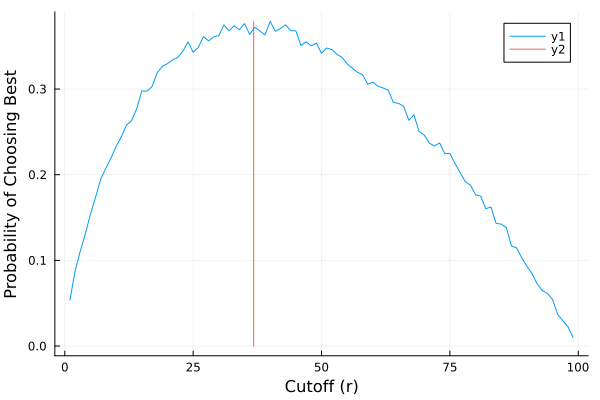

In [8]:
probabilities = loop_strategy_r(100)

# Plot probability of finding best candidate versus r
# Also plot the theoretical maximum value of r
plot(probabilities);
plot!([n/exp(1) , n/exp(1)] , [0.0,maximum(probabilities)])
xlabel!("Cutoff (r)")
ylabel!("Probability of Choosing Best")